In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data

In [5]:
data = pd.read_csv(r'C:\Users\hmutp\OneDrive\Desktop\CodeAlphaIntern\UnemploymentAnalysis\Unemployment_Rate_upto_11_2020.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [12]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [13]:
# convert date column to datetime
data[' Date'] = pd.to_datetime(data[' Date'])

C:\Users\hmutp\AppData\Local\Temp\ipykernel_4728\3054288627.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[' Date'] = pd.to_datetime(data[' Date'])


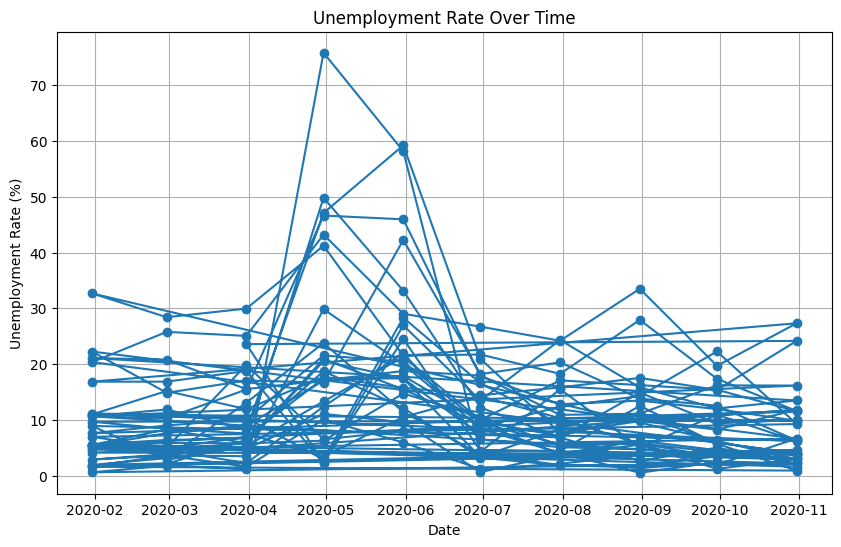

In [15]:
# Plot unemployment rate over time
plt.figure(figsize=(10,6))
plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)'], marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [16]:
# Filtering data before and after the COVID-19 pandemic
pre_covid = data[data[' Date'] < '2020-03-01']
post_covid = data[data[' Date'] >= '2020-03-01']

# Calculate average unemployment rates
pre_covid_rate = pre_covid[' Estimated Unemployment Rate (%)'].mean()
post_covid_rate = post_covid[' Estimated Unemployment Rate (%)'].mean()

print(f"Average unemployment rate before COVID-19: {pre_covid_rate:.2f}%")
print(f"Average unemployment rate after COVID-19: {post_covid_rate:.2f}%")

Average unemployment rate before COVID-19: 9.23%
Average unemployment rate after COVID-19: 12.96%


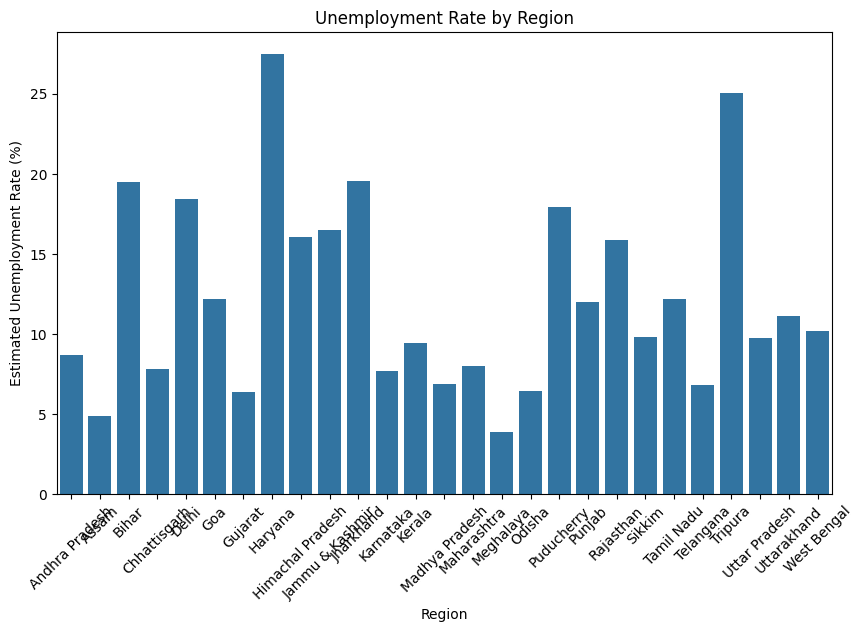

In [18]:
region_data = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Plot unemployment rate by sector
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=region_data)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()